In [1]:
import pymysql
import pickle

MYSQL_USER_DATA_SAVED_FILE = "mysql/userinfo"

f = open(MYSQL_USER_DATA_SAVED_FILE, 'rb')
mysql_user_info = pickle.load(f)
f.close()

In [2]:
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    insert into pydb_test(name, price) values (%s, %s)
"""

cursor.execute(sql, ('Xeon Server', 10000000))
cursor.execute(sql, ('FPGA Server', 2000000000))
cursor.execute(sql, ('GPU Server', 1000000000))
cursor.execute(sql, ('RTX 4090', 4000000))

db.commit()

db.close()

print('파이썬을 활용한 db 입력 성공!')

ProgrammingError: (1146, "Table 'pydb.pydb_test' doesn't exist")

In [ ]:
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    select * from pydb_test;
"""

cursor.execute(sql)

rows = cursor.fetchall()

for row in rows:
    print(row)
    
db.close()

print('파이썬을 활용한 db 테이블 조회 성공!')

In [ ]:
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor(pymysql.cursors.DictCursor)

sql = """
    select * from pydb_test;
"""

cursor.execute(sql)

rows = cursor.fetchall()

for row in rows:
    print('id: ', row['id'], ', name: ', row['name'], ', price: ', row['price'])
    
db.close()

print('파이썬을 활용한 db 테이블 컬럼 단위 조회 성공!')

In [ ]:
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    drop table pydb_test;
"""

cursor.execute(sql)

db.commit()
db.close()

print('파이썬을 활용한 db 테이블 삭제 성공!')

In [ ]:
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    create table power_data(
        no integer not null auto_increment primary key,
        voltage float not null,
        current float not null,
        vendor text null,
        name text not null,
        reg_date timestamp not null default now()
    )
"""

cursor.execute(sql)

db.commit()
db.close()

print('float 형태의 전력 데이터 관리 테이블 생성 성공!')

In [3]:
import time
import math
import calendar
import datetime
import numpy as np

In [16]:
sample_time = np.arange(0, 10, 0.001)

print(sample_time)
print(len(sample_time))

[0.000e+00 1.000e-03 2.000e-03 ... 9.997e+00 9.998e+00 9.999e+00]
10000


In [17]:
# 정규 분포 형태의 랜덤
noise = np.random.normal(size = len(sample_time))

print(noise)

[ 0.24692617 -0.47856173  0.23506055 ... -0.95996394 -0.89395541
 -0.65263312]


In [18]:
# P = VI
voltage = 3 * np.cos(5 * sample_time) + noise
current = 3 * np.sin(3 * sample_time + (math.pi / 3)) + noise

print(voltage)
print(current)

[3.24692617 2.52140077 3.23491055 ... 1.92280205 1.99292681 2.23829318]
[ 2.84500238  2.12400279  2.84208994 ... -2.06639545 -1.99201641
 -1.74231373]


In [19]:
#!pip install matplotlib

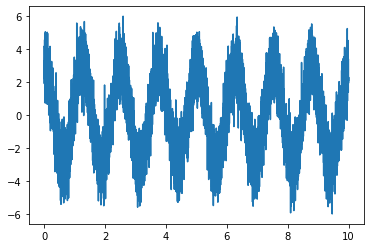

In [20]:
import matplotlib.pyplot as plt

plt.plot(sample_time, voltage)
plt.show()

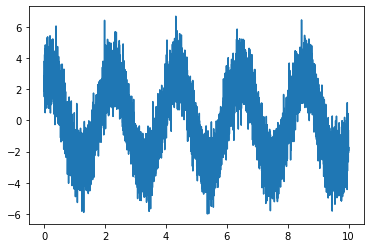

In [21]:
plt.plot(sample_time, current)
plt.show()

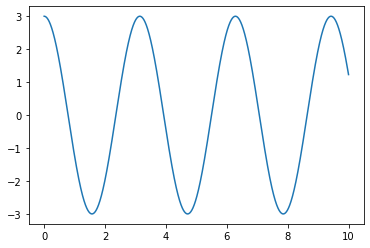

In [22]:
non_noise_voltage = 3 * np.cos(2 * sample_time)

plt.plot(sample_time, non_noise_voltage)
plt.show()

In [23]:
ts = calendar.timegm(time.gmtime())

print(ts)
print(datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

1664523838
2022-09-30 16:43:58


In [24]:
sample_time = np.array(sample_time, dtype=np.float32)
voltage = np.array(voltage, dtype=np.float32)
current = np.array(current, dtype=np.float32)

print(sample_time)
print(voltage)
print(current)

[0.000e+00 1.000e-03 2.000e-03 ... 9.997e+00 9.998e+00 9.999e+00]
[3.246926  2.5214007 3.2349105 ... 1.9228021 1.9929268 2.2382932]
[ 2.8450024  2.1240027  2.84209   ... -2.0663955 -1.9920164 -1.7423137]


In [25]:
ts = (sample_time * 1000) + ts
ts_len = len(ts)
print(ts)
print(ts_len)

[1.66452384e+09 1.66452384e+09 1.66452384e+09 ... 1.66453384e+09
 1.66453384e+09 1.66453384e+09]
10000


In [29]:
curr_time = []

#print(ts.tolist())
ts_arr = ts.tolist()

print(ts_arr[1])
print(datetime.datetime.fromtimestamp(ts_arr[1]).strftime('%Y-%m-%d %H:%M:%S'))
print(ts_arr[2])
print(datetime.datetime.fromtimestamp(ts_arr[2]).strftime('%Y-%m-%d %H:%M:%S'))

for i in range(len(sample_time)):
    print(i)
    curr_time.append(datetime.datetime.fromtimestamp(ts_arr[i]).strftime('%Y-%m-%d %H:%M:%S'))
    
print(curr_time)

데이터 지우기


In [27]:
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    insert into power_data(voltage, current, vendor, name, reg_date)
        values (%s, %s, %s, %s, %s)
"""

try:
    with db.cursor() as cursor:
        for i in range(len(sample_time)):
            cursor.execute(sql,
                           (
                               str(voltage[i]),
                               str(current[i]),
                               'EDDI',
                               'P32N21BTN77PW',
                               curr_time[i]
                           ))
            
        db.commit()
        
finally:
    db.close()

print('float 형태의 전력 데이터 db 입력 성공!')

float 형태의 전력 데이터 db 입력 성공!


In [30]:
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    select * from power_data;
"""

cursor.execute(sql)

rows = cursor.fetchall()

for row in rows:
    print(row)
    
db.close()

print('float 형태의 전력 데이터 db 조회 성공!')

데이터 지우기
